In [99]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

### Data Exploration and Analysis

In [64]:
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [65]:
df.shape

(2290, 6)

In [66]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [68]:
df.Date = df.Date.apply(pd.to_datetime)

In [69]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [70]:
df['Year'] = pd.DatetimeIndex(df['Date']).year # year column for extract some insights
df.head() 

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,2008


In [71]:
df.groupby('Year').mean()

,SPX,GLD,USO,SLV,EUR/USD
Year,,,,,
2008,1208.337274,86.111148,77.528756,14.760708,1.464481
2009,945.604864,95.834464,34.145446,14.478527,1.393900
2010,1142.600627,119.966397,36.651847,19.922883,1.330050
2011,1268.544188,152.591486,37.781486,34.118063,1.389480
2012,1378.354519,162.151507,35.541598,30.349772,1.287449
2013,1642.193891,136.853213,35.014751,23.179909,1.329559
2014,1930.589375,121.721294,33.887277,18.276295,1.327894
2015,2061.795563,111.165561,16.527623,14.999596,1.109867
2016,2091.121803,118.780634,10.474525,16.161176,1.105778


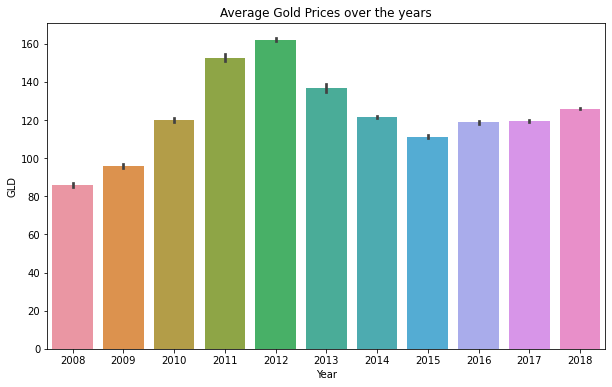

In [72]:
plt.figure(figsize=(10,6))
plt.title('Average Gold Prices over the years')
sns.barplot(x='Year', y='GLD', data=df);

In [73]:
df2 = df.copy()
df2.drop('Year', axis=1, inplace=True) # don't need the year column 
df2.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


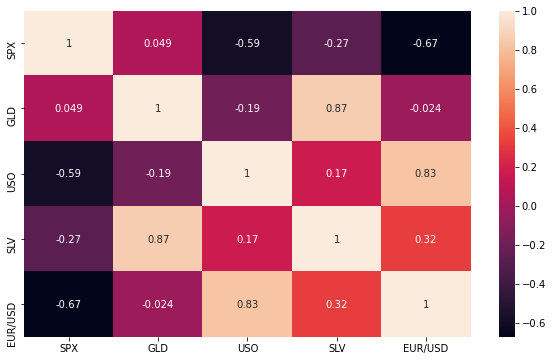

In [74]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(), annot=True);

- GLD is highly Postivily correlated with SLV (87%)


C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.3341383472692508
Kurtosis: -0.2750805233458311


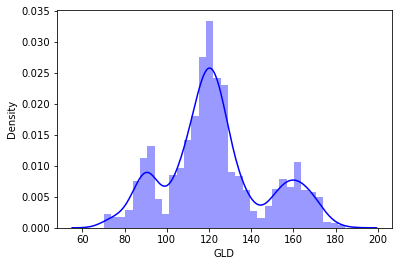

In [75]:
sns.distplot(df['GLD'], color = 'blue')
print(f"Skewness: {df['GLD'].skew()}")
print(f"Kurtosis: {df['GLD'].kurt()}");

Data is normally distributed Data has low kurtosis tend to lack of outliers and data is a very little skewed to right

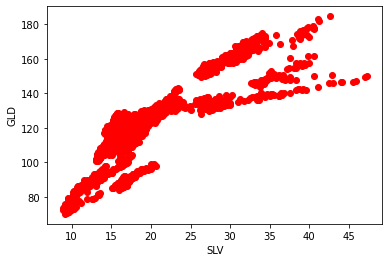

In [76]:
plt.scatter(df.SLV, df.GLD, c='red') #highly correlated
plt.xlabel('SLV')
plt.ylabel('GLD')
plt.show()

### Assign Feature and Target variable

In [77]:
X = df2.drop(['GLD', 'Date'], axis=1)
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [78]:
y = df2.GLD

### Splitting the data into Training and Testing data

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [80]:
len(X_train)

1717

In [81]:
len(X_test)

573

### Building and Training the model

In [86]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

### Accuracy of the model

In [87]:
model.score(X_test, y_test)

0.991078101214613

### Save the model

In [100]:
joblib.dump(model, "Gold Price Prediction Model")

['Gold Price Prediction Model']